# 调用训练好的 StyleGAN V2 模型生成草莓图像

> 作者：[同济子豪兄](https://space.bilibili.com/1900783)、杨逸飞 2022-4-10

## 进入MMGeneration主目录

In [1]:
import os
os.chdir('mmgeneration')
os.listdir()

['.git',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'LICENSES.md',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'apps',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmgen',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmgen.egg-info',
 'outputs',
 'data',
 'checkpoints',
 'work_dirs']

## 命令行方式调用

In [14]:
# 训练得到的最新模型
!python demo/unconditional_demo.py \
    configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py \
    work_dirs/experiments/stylegan2_c2_ffhq_256_b4x8_800k/ckpt/stylegan2_c2_ffhq_256_b4x8_800k/latest.pth \
    --num-samples 66 \
    --save-path outputs/strawberry_1.jpg \
    --device cuda:0

load checkpoint from local path: work_dirs/experiments/stylegan2_c2_ffhq_256_b4x8_800k/ckpt/stylegan2_c2_ffhq_256_b4x8_800k/latest.pth
2022-04-10 22:57:10,942 - mmgen - INFO - Switch to evaluation style mode: single
2022-04-10 22:57:10,943 - mmgen - INFO - Switch to evaluation style mode: single


In [3]:
# 子豪兄训练得到的模型
!python demo/unconditional_demo.py \
    configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py \
    https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth \
    --num-samples 66 \
    --save-path outputs/strawberry_2.jpg \
    --device cuda:0

load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth
Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth" to /home/featurize/.cache/torch/hub/checkpoints/strawberry_iter_2500.pth
100%|████████████████████████████████████████| 790M/790M [00:14<00:00, 57.2MB/s]
2022-04-10 14:33:20,928 - mmgen - INFO - Switch to evaluation style mode: single
2022-04-10 14:33:20,929 - mmgen - INFO - Switch to evaluation style mode: single


In [4]:
# 子豪兄训练得到的西瓜图像生成模型
!python demo/unconditional_demo.py \
    configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py \
    https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/watermelon_iter_1500.pth \
    --num-samples 66 \
    --save-path outputs/watermelon.jpg \
    --device cuda:0

load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/watermelon_iter_1500.pth
Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/watermelon_iter_1500.pth" to /home/featurize/.cache/torch/hub/checkpoints/watermelon_iter_1500.pth
100%|████████████████████████████████████████| 790M/790M [00:12<00:00, 67.1MB/s]
2022-04-10 14:33:52,861 - mmgen - INFO - Switch to evaluation style mode: single
2022-04-10 14:33:52,862 - mmgen - INFO - Switch to evaluation style mode: single


## Python API 方式调用

### 导入工具包

In [2]:
# 导入mmcv和mmgeneration
import mmcv
from mmgen.apis import init_model, sample_unconditional_model

# 导入numpy和matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 载入训练好的 StyleGAN V2 模型

注意，`config_file`和`checkpoint_file`需要对应。

In [3]:
# 教堂图像生成模型
# 指定config文件路径
config_file = 'configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py'

# 指定预训练模型权重文件路径
# checkpoint_file = 'https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/iter_1500.pth'
checkpoint_file = 'work_dirs/experiments/stylegan2_c2_ffhq_256_b4x8_800k/ckpt/stylegan2_c2_ffhq_256_b4x8_800k/latest.pth'

# 输出图像宽高像素尺寸
img_size = 256

# 初始化generatvie
model = init_model(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: work_dirs/experiments/stylegan2_c2_ffhq_256_b4x8_800k/ckpt/stylegan2_c2_ffhq_256_b4x8_800k/latest.pth


2022-04-10 22:56:08,338 - mmgen - INFO - Switch to evaluation style mode: single
2022-04-10 22:56:08,340 - mmgen - INFO - Switch to evaluation style mode: single


### 仿照 B1 代码教程，生成若干张草莓图像

In [4]:
# 生成 n的平方 张图像
n = 8

# 生成图像
fake_imgs = sample_unconditional_model(model, n*n)

In [5]:
fake_imgs.shape

torch.Size([64, 3, 256, 256])

展示单张生成的图像

In [6]:
# 将torch张量转为numpy的array
fake_imgs = fake_imgs.numpy()

In [7]:
fake_imgs.shape

(64, 3, 256, 256)

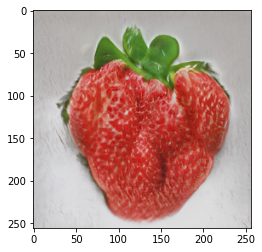

In [13]:
# 选择要展示的图片索引号
index = 7

# 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
RGB = np.zeros((img_size, img_size, 3))
RGB[:,:,0] = fake_imgs[index][2]
RGB[:,:,1] = fake_imgs[index][1]
RGB[:,:,2] = fake_imgs[index][0]

RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
RGB = RGB.astype('uint8')
plt.imshow(RGB)
plt.show()

### n行n列展示生成的图像

In [9]:
def show_fake_img(index):
    '''输入索引号，展示对应的图像'''

    # 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
    RGB = np.zeros((img_size,img_size,3))
    RGB[:,:,0] = fake_imgs[index][2]
    RGB[:,:,1] = fake_imgs[index][1]
    RGB[:,:,2] = fake_imgs[index][0]

    RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
    RGB = RGB.astype('uint8')
    return RGB
#     plt.imshow(RGB)
#     plt.show()

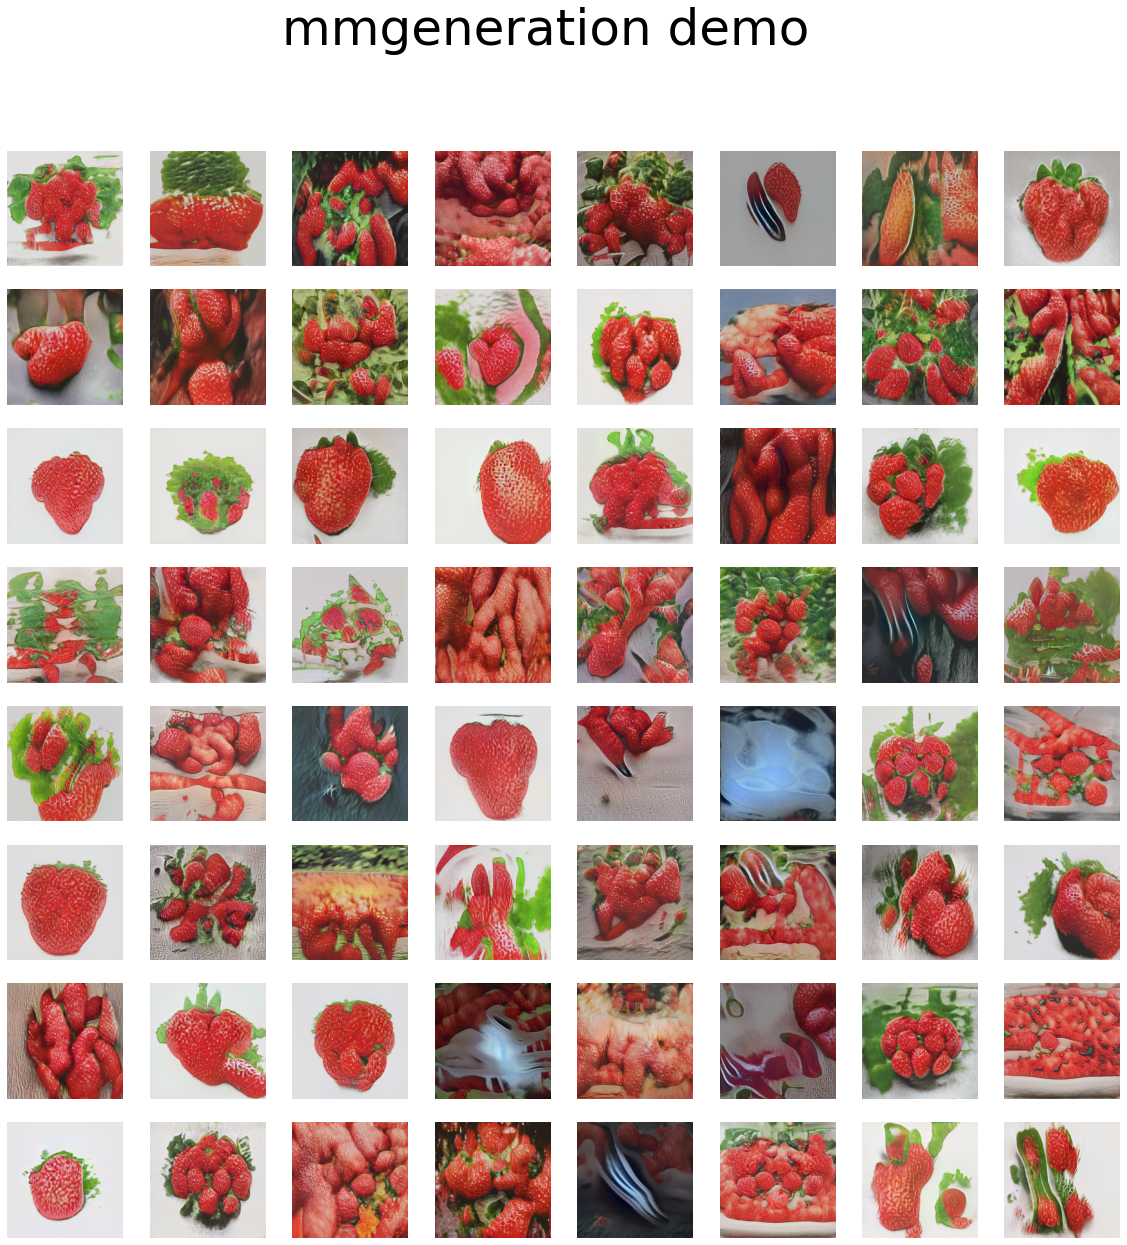

In [10]:
fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(20,20))
for i in range(n*n):
    axes[i//n, i%n].imshow(show_fake_img(i))
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('mmgeneration demo',fontsize=50)
plt.show()